In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
df = pd.read_csv("exams.csv")


In [47]:
y = df['math score']


In [48]:
df['total'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total'] / 3


In [49]:
X = df.drop(columns=['math score', 'total', 'average'])
X = pd.get_dummies(X, drop_first=True)


In [50]:
X.head()


,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,70,78,False,False,False,True,False,False,False,False,True,False,True,False
1,93,87,True,False,False,True,False,False,False,False,False,False,True,True
2,76,77,False,False,False,True,False,False,False,False,True,False,False,True
3,70,63,True,True,False,False,False,False,False,False,True,False,False,True
4,85,86,False,False,False,True,False,False,False,False,False,False,True,True


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
y_pred = model.predict(X_test)


In [54]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 24.838558210542566
R2 Score: 0.8874881345612097


In [55]:
coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coeff.head()


,Feature,Coefficient
2,gender_male,12.865879
6,race/ethnicity_group E,4.763041
12,lunch_standard,4.519123
13,test preparation course_none,3.875360
1,writing score,0.673420


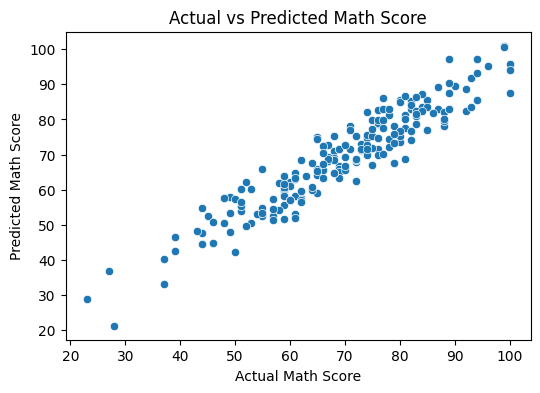

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Math Score")
plt.ylabel("Predicted Math Score")
plt.title("Actual vs Predicted Math Score")
plt.show()




In [57]:
residuals = y_test - y_pred


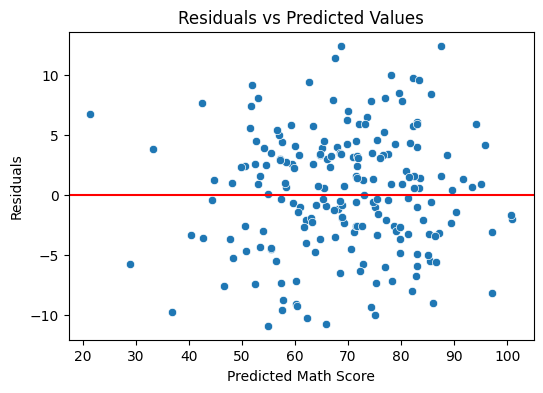

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Math Score")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


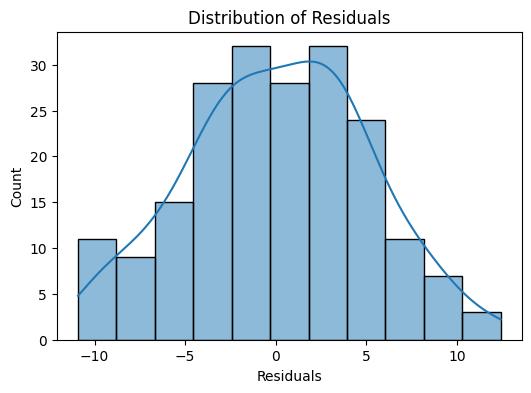

In [59]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [61]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)


,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [62]:
y_pred_ridge = ridge.predict(X_test_scaled)


In [63]:
from sklearn.metrics import mean_squared_error, r2_score

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2  = r2_score(y_test, y_pred_ridge)

print("Ridge MSE:", ridge_mse)
print("Ridge R2:", ridge_r2)


Ridge MSE: 24.86477927139161
Ridge R2: 0.8873693603374845


In [64]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)


,alpha,0.1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [65]:
y_pred_lasso = lasso.predict(X_test_scaled)


In [66]:
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2  = r2_score(y_test, y_pred_lasso)

print("Lasso MSE:", lasso_mse)
print("Lasso R2:", lasso_r2)


Lasso MSE: 24.919655539344333
Lasso R2: 0.8871207858742107


In [67]:
ridge_coeff = pd.Series(ridge.coef_, index=X.columns).sort_values(key=abs, ascending=False)
ridge_coeff.head(10)


writing score                                    10.167112
gender_male                                       6.409942
reading score                                     3.970522
lunch_standard                                    2.168571
test preparation course_none                      1.806457
race/ethnicity_group E                            1.661298
parental level of education_some high school     -0.237813
parental level of education_bachelor's degree    -0.194579
race/ethnicity_group C                            0.152831
parental level of education_master's degree      -0.141134
dtype: float64

In [68]:
lasso_coeff = pd.Series(lasso.coef_, index=X.columns).sort_values(key=abs, ascending=False)
lasso_coeff.head(10)


writing score                                    9.740750
gender_male                                      6.246474
reading score                                    4.231777
lunch_standard                                   2.109895
test preparation course_none                     1.647674
race/ethnicity_group E                           1.498977
parental level of education_some high school    -0.104596
parental level of education_bachelor's degree   -0.024254
race/ethnicity_group B                           0.000000
race/ethnicity_group C                           0.000000
dtype: float64

In [69]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "MSE": [mse, ridge_mse, lasso_mse],
    "R2 Score": [r2, ridge_r2, lasso_r2]
})

results


,Model,MSE,R2 Score
0,Linear Regression,24.838558,0.887488
1,Ridge Regression,24.864779,0.887369
2,Lasso Regression,24.919656,0.887121


In [70]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "MSE": [mse, ridge_mse, lasso_mse],
    "R2 Score": [r2, ridge_r2, lasso_r2]
})

comparison


,Model,MSE,R2 Score
0,Linear Regression,24.838558,0.887488
1,Ridge Regression,24.864779,0.887369
2,Lasso Regression,24.919656,0.887121


Conclusion

Exploratory Data Analysis was performed to understand the dataset and identify key patterns.
After preprocessing and encoding categorical variables, Linear Regression was applied to predict student math scores.
Ridge and Lasso regression were further implemented to reduce overfitting and improve generalization.
Model comparison showed that Linear and Ridge regression performed similarly, while Lasso performed feature selection by shrinking less important coefficients.
Overall, the regression models demonstrated strong predictive performance, confirming the suitability of linear models for this dataset.